### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 
The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

In [4]:
# Importing Libraries

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#numpy and pandas library
import numpy as np
import pandas as pd

pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

#data visualization Library
import matplotlib.pyplot as plt
import seaborn as sns


# Using sklearn library we will create a training and test data
from sklearn.model_selection import train_test_split

# importing MinMaxScaler function for feature scaling
from sklearn.preprocessing import MinMaxScaler

# importing RFE and LinearRegression for creating LM model object
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#Importing statsmodel library for getting the summary of the model
import statsmodels.api as sm

#Using statsmodel library and importing variance_inflation_factor function
from statsmodels.stats.outliers_influence import variance_inflation_factor

#importing R-square function from sklearn library
from sklearn.metrics import r2_score

#### We will perform the below step to reach to conclusion 
- Load the given data and do Inpection on the given data
- Clean the data
    - Checking for null value and unnecessary coloumns
    - Removing Unneccessary coloumns
    - correcting data if requiered 
- Visualition of data
    - Data mapping
    - Analysis via Data Visualization
        - Checking the outliers for numeric variables
        - Plotting Numeric Variables
        - Visualising Categorical Variables
        - Correlation Matrix
- Data Preparation for linear Regression
    - creating dummy variables for categorical variables
    - Splitting Data into Training and Testing Sets
    - Scaling
    - Creating X and Y sets for the model building
- Building Linear Model
    - RFE(Recursive Feature Elimination)
- Resedual Analysis
- Model Evaluation
    - R-Square of Final Model on Train Dataset and Test Dataset respectively
-Equation for Best Fitted Line
- Conclusion
    

### Load the given data and do Inpection on the given data

In [7]:
#reading the dataset
bike_df = pd.read_csv("day.csv")
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
bike_df.shape

(730, 16)

__Infer__: There are total 730 Rows and 16 Coloumns in the given data set 

Lets check the infomation related to given dataset

In [11]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [12]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Clean the data

In this step we will check if there is any unwanted or corrupted data is there in the given dataset , also will check for the null values and unwanted coloumns

In [15]:
# lets check if there is anu null values are there in the dataset coloumn vise 
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

__Infer__: as we can see there is no null value in the dataset 

In [17]:
# dropping if there is any duplicate data
bike_df=bike_df.drop_duplicates()
bike_df.shape

(730, 16)

__Infer__: As we can see shape is still the same so we can say that there was no duplicate data was there in the dataset

### Removing Unneccessary coloumns

In [20]:
# lets print all the coloumn 
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [21]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


- instant is the record Index so we will drop that
- remove dteDay because details of day and month are provided in other coloumn as well
- casual and registered will be dropped, because cnt is sum of both the values and we will use cnt

In [23]:
bike_df.drop(['instant'],axis=1,inplace=True)

bike_df.drop(['dteday'],axis=1,inplace=True)

bike_df.drop(['casual'],axis=1,inplace=True)

bike_df.drop(['registered'],axis=1,inplace=True)


In [24]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


- Now we can see there are 12 coloumns and all the of them are of numeric type 

##### Now we will start with Data visualization to identify the relation between the coloumns 

### Visualition of data

There are some coloumns which are categorical lets identifying them and convert them as per data dictionary 

##### Data mapping
- As we can see as per info/data dictionary season,weekday,weathshit,and mnth are the categorical coloumns
  so mapping them to there string values

In [30]:
# mapping values of seasons as per data dictionary
bike_df[['season']] = bike_df[['season']].apply(lambda x : x.map({1:'spring',2:'summer',3:'fall',4:'winter'}))

In [31]:
#mapping values of mnth from data dictionary
bike_df[['mnth']] = bike_df[['mnth']].apply(lambda x : x.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug'
                                                        ,9:'sep',10:'oct',11:'nov',12:'dec'}))

In [32]:
#mapping values of weekday from data dictionary
bike_df[['weekday']] = bike_df[['weekday']].apply(lambda x : x.map({1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat',0:'sun'}))

In [33]:
#mapping values of weathersit from data dictionary
bike_df[['weathersit']] = bike_df[['weathersit']].apply(lambda x : x.map({1:'clear',2:'mist & cloudy',3:'light snow & rain'
                                                                    ,4:'heavy rain & ice pallets',}))

In [34]:
#looking into dataset again after mapping 
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist & cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist & cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [35]:
bike_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

#### Analysis via Data Visualization
In this step we will plot a graph to see if there is any outliers in the data and to check the distribution of data also we will find the correlation between the coloumns

##### Checking the outliers for numeric variables

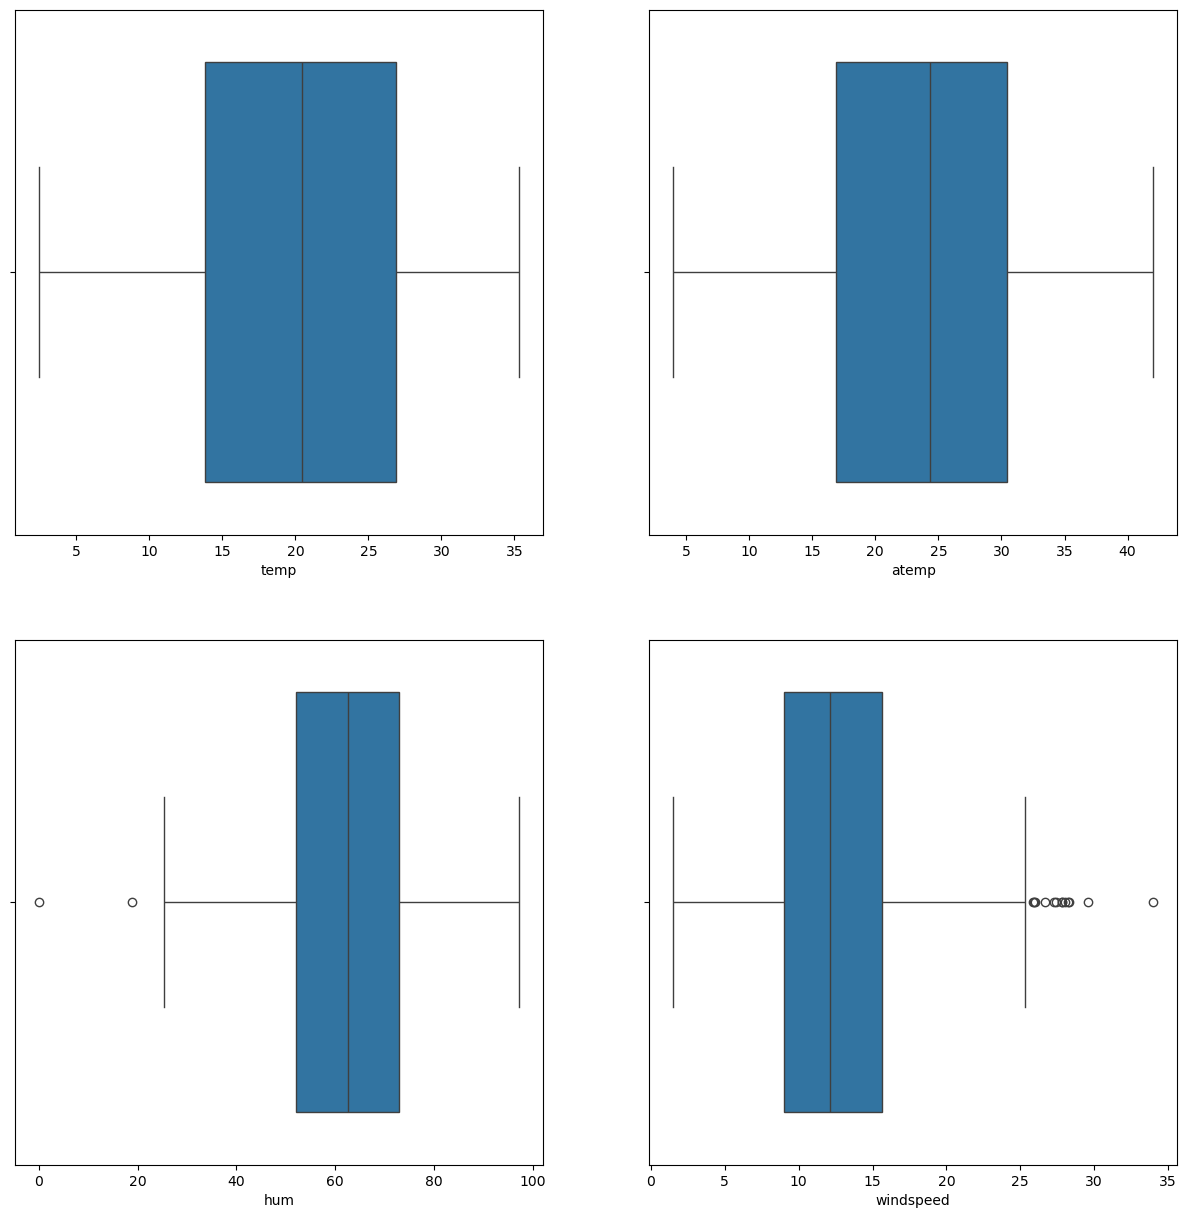

In [38]:
plt.figure(figsize=(15, 15))
plt.subplot(2,2,1)
sns.boxplot(x = 'temp', data = bike_df)
plt.subplot(2,2,2)
sns.boxplot(x = 'atemp', data = bike_df)
plt.subplot(2,2,3)
sns.boxplot(x = 'hum', data = bike_df)
plt.subplot(2,2,4)
sns.boxplot(x = 'windspeed', data = bike_df)
plt.show()

In [39]:
bike_df[bike_df.windspeed>26]["windspeed"].count()

11

__Infer__: 
- There are no outliers in temp,atemp and hum
- There are some in windspeed but there are very less and not far from upper thresh hold so will keep them            

##### Plotting Numeric VariablesWe wills make a scatterplot of all the numeric variables w.r.t to Target Variabl to understand the corelatione


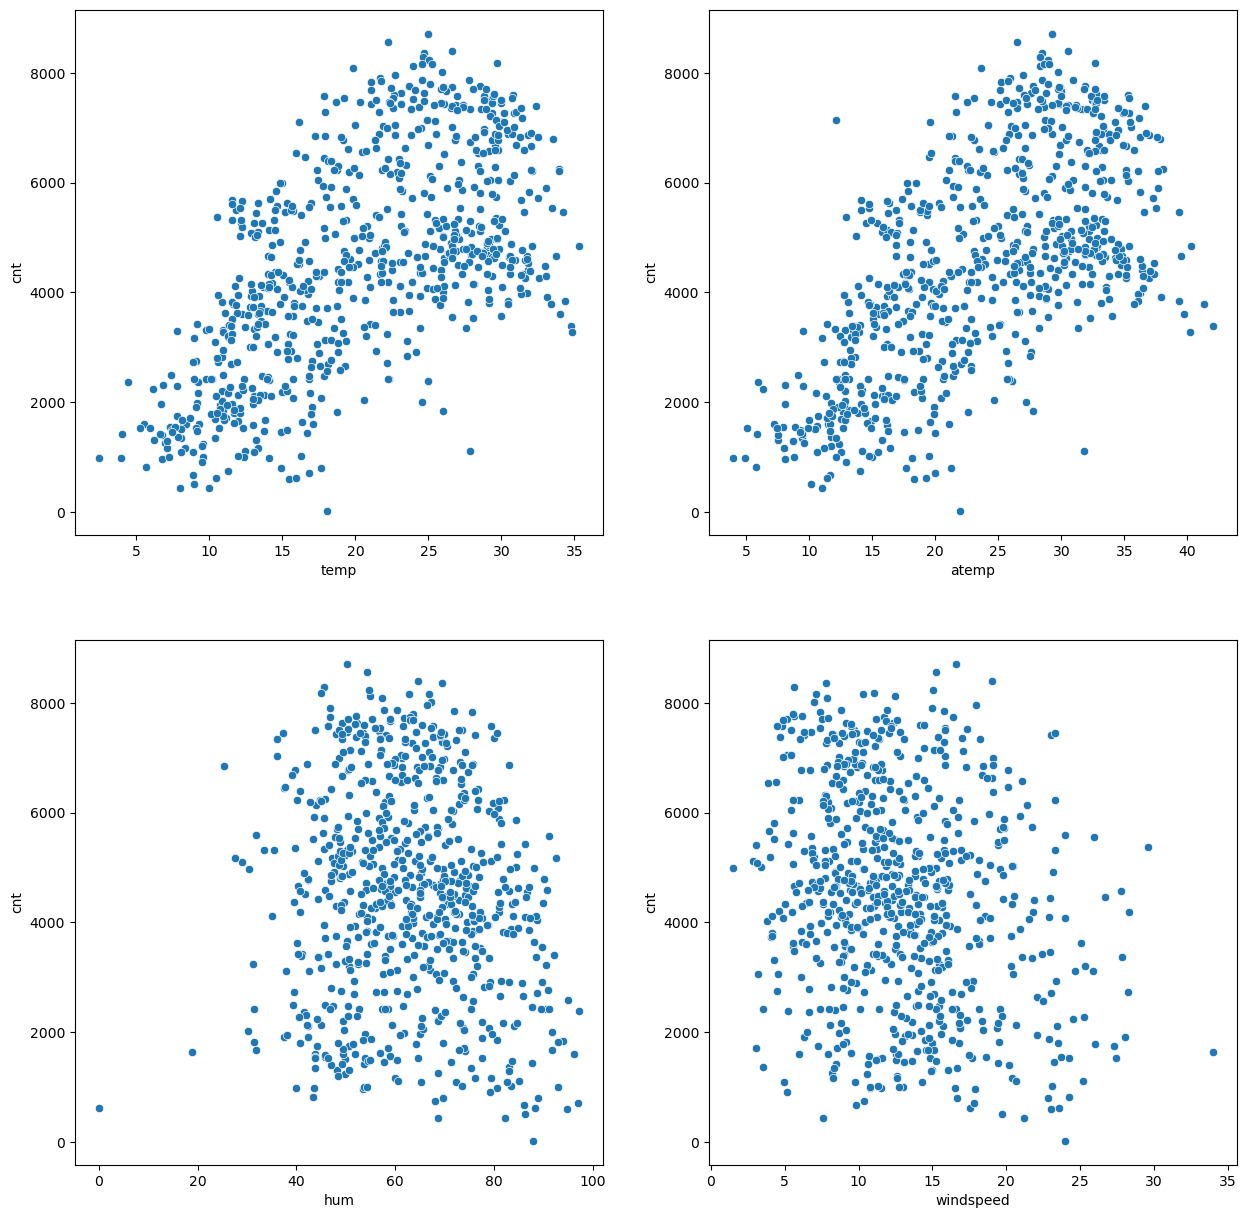

In [42]:
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(15,15))

i = 1
for col in cols:
    plt.subplot(2,2,i)
    sns.scatterplot(x=col,y='cnt' ,data=bike_df)
    i=i+1

Infer on CNT vs Numeric Variables:-
- Cnt seems postively correlated with temp,atemp variable.
- Cnt seems negatively correlated with hum,windspeed variable.

#### Visualising Categorical Variables

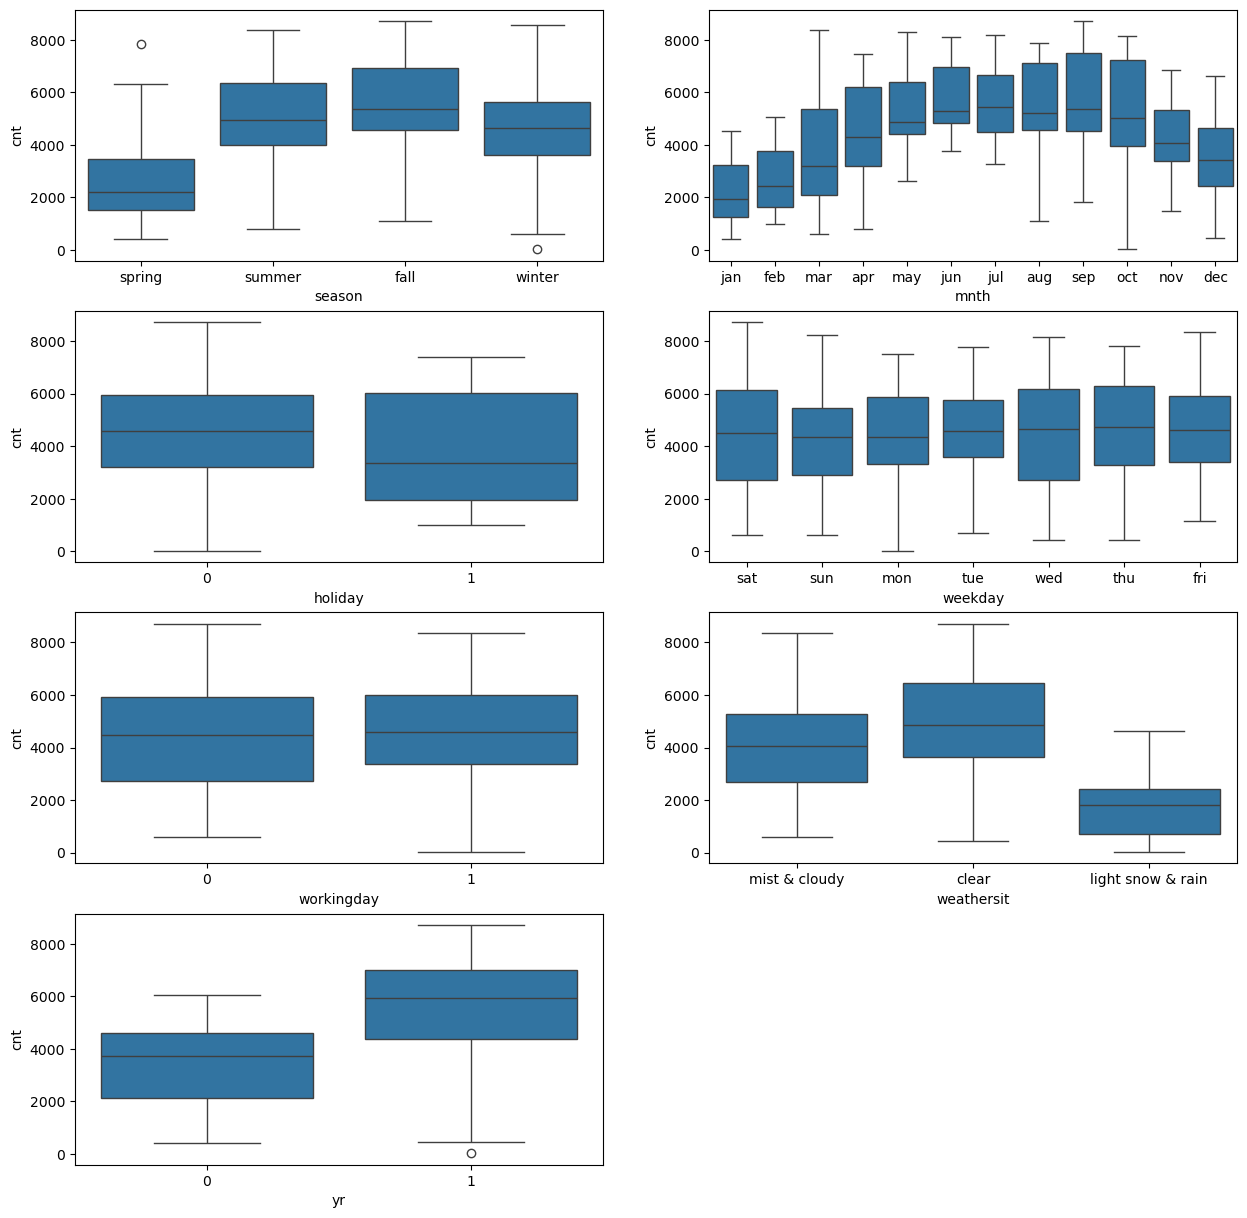

In [45]:
cols = ['season', 'mnth', 'holiday', 'weekday','workingday','weathersit','yr']
plt.figure(figsize=(15,15))

i = 1
for col in cols:
    plt.subplot(4,2,i)
    sns.boxplot(x=col,y='cnt' ,data=bike_df)
    i=i+1

Conclusion how Cnt variable dependes on different categorical variables
- There is drop in  bike rent count in spring season where as most bikes are rented in fall season.
- There is increasing trend in bikes rented in the month of January to September with dip in month of November & 
  December.
- Majority of bikes are rented in the month of June to September.
- Majority of bikes are rented when there is no holiday.
- Almost everyday of week bike rented equally, there is very slight difference in some of ths day of week 
- Bikes are rented more when there is clear weather with few clouds or partly cloudy.
- Bikes are rented less when there are light snow and rain with scattered clouds.
- Bikes are not rented when there is Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.
- Bikes are rented more in year 2019 compared to 2018

### Correlation Matrix

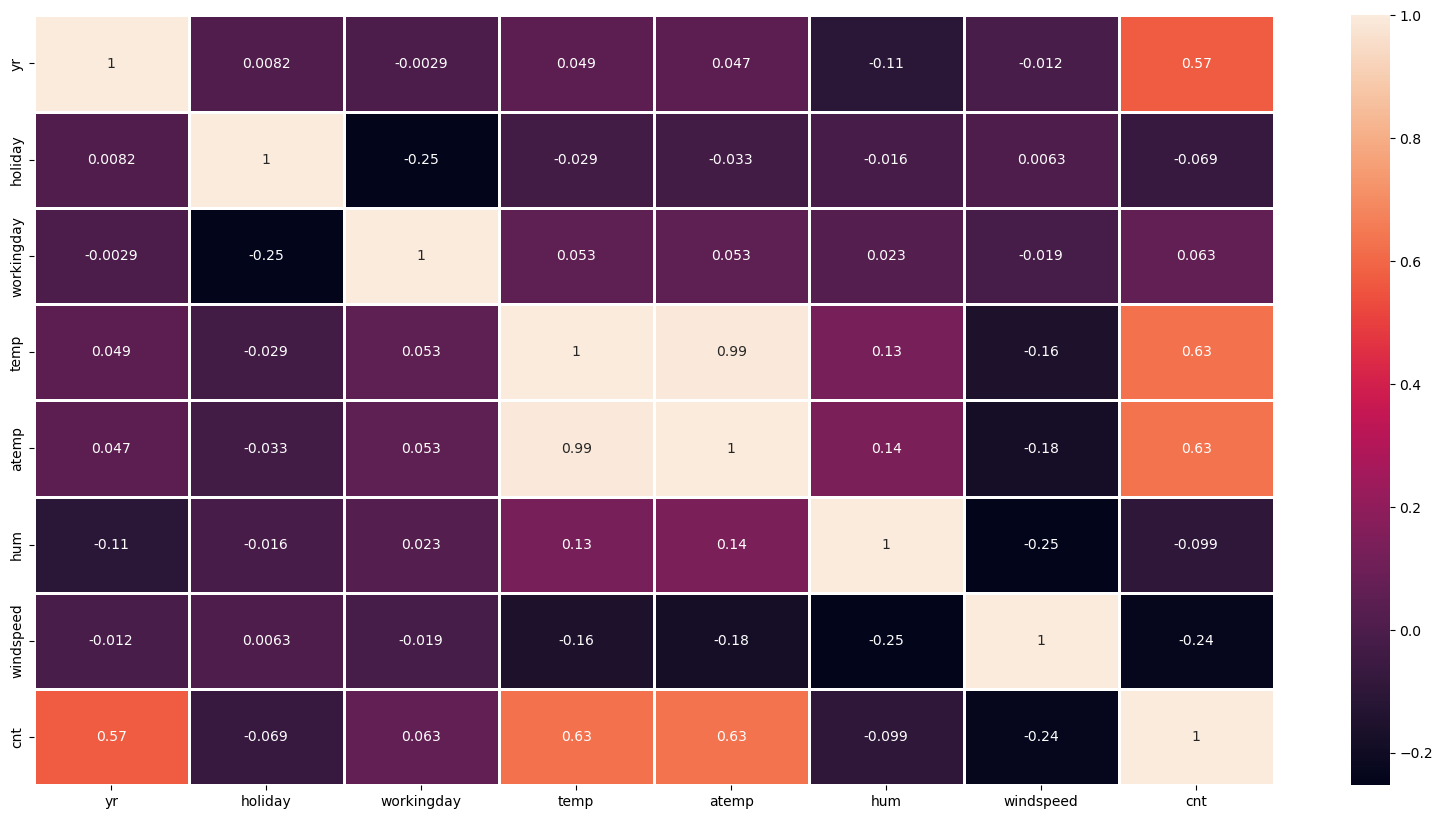

In [48]:
# Checking Correlation among variables to discover multicollinearity
plt.figure(figsize = (20,10))
sns.heatmap(bike_df.corr(numeric_only=True),annot=True,linewidths=2)
plt.show()

Infer :
- Dependent Variable Cnt is highly positively correlated with predictor variable `temp` , `atemp` and `yr`- Dependent Variable Cnt  is negatively correlated with predictor variable 'windspeed and `hum`
- Independentor Variabl`temp` and `atemp` are e highly correlated with each other which shows the casof
  f multicollinearity.

- As we observed `temp` and `atemp` are highly correlated so we can drop one coloumn since both will result into same impact dependent variable ,So dropping `atemp` variable

In [51]:
# dropping atemp coloumn
bike_df.drop(['atemp'],axis = 1, inplace = True)

### Data preparation for linar regression

##### Creating dummy variables for categorical variables
The variables `season` , `mnth` , `weekday` , `weathersit` has multiple levels. We will convert these levels into integer.`.

In [54]:
season_dummy = pd.get_dummies(bike_df['season'],dtype=int)
season_dummy.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


- we dont need fall coloumn we can identify type of seasons from combination of other three coloumns
- for other variable we will drop the first coloumn while creating dummy variable using `drop_first` parameter

In [56]:
#dummy variable for season
season_dummy = pd.get_dummies(bike_df['season'], drop_first = True,dtype=int)

In [57]:
season_dummy.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [58]:
#dummy variable for mnth
mnth_dummy = pd.get_dummies(bike_df['mnth'], drop_first = True,dtype=int)
mnth_dummy.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [59]:
#dummy variable for weekday
weekday_dummy = pd.get_dummies(bike_df['weekday'], drop_first = True,dtype=int)
weekday_dummy.head()

,mon,sat,sun,thu,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [60]:
#dummy variable for weathersit
weathersit_dummy= pd.get_dummies(bike_df['weathersit'], drop_first = True,dtype=int)
weathersit_dummy.head()

,light snow & rain,mist & cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [61]:
# Add the dummy variables data to the bike dataframe
bike_df = pd.concat([bike_df, season_dummy, mnth_dummy, weekday_dummy, weathersit_dummy ], axis = 1)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,light snow & rain,mist & cloudy
0,spring,0,jan,0,sat,0,mist & cloudy,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,0,sun,0,mist & cloudy,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,mon,1,clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,tue,1,clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,spring,0,jan,0,wed,1,clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


- Now we will drop the `season` , `mnth` , `weekday` , `weathersit` as we dont need them anymore we will use dummy dataset instead

In [63]:
#dropping 'season' , 'mnth' , 'weekday' , 'weathersit'
bike_df.drop(['season' , 'mnth' , 'weekday' , 'weathersit'], axis = 1, inplace = True)

In [64]:
bike_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,light snow & rain,mist & cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Splitting Data into Training and Testing Sets

In [66]:
# we will split the data into 75:25 ratio where 
bike_train, bike_test = train_test_split(bike_df, train_size = 0.75, random_state = 100)


### Scaling

Scaling is the important step in building the linear regression model , if the variable we are going to compare are not in same scale of measurment  then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients.


There are two common ways of rescaling:
- Min-Max scaling
- Standardisation-1)

In [69]:
# we will use MinMax scaling
scaler = MinMaxScaler()

In [70]:
# Apply scaler to all the numeric columns except the 'binary' and 'dummy' variables
bike_vars = ['temp', 'hum', 'windspeed', 'cnt']
# Fit and transform training set
bike_train[bike_vars] = scaler.fit_transform(bike_train[bike_vars])

In [71]:
bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,light snow & rain,mist & cloudy
311,0,0,1,0.435124,0.743667,0.057471,0.481247,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
523,1,0,1,0.735215,0.482181,0.286093,0.887483,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
381,1,0,1,0.391151,0.737917,0.659615,0.335136,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
413,1,0,0,0.358285,0.550880,0.319514,0.494248,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
253,0,0,0,0.740406,0.735509,0.156398,0.578003,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


##### Creating X and Y sets for the model building

In [73]:
y_train = bike_train.pop('cnt')
X_train = bike_train

### Building Linear Model

##### RFE(Recursive Feature Elimination)
We will use RFE techinque to build a regression model where we will start with 15 columns and will test the model by recussively reducing the column size

In [76]:
# Running RFE with coloumn count= 15

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,step=15) 
rfe = rfe.fit(X_train, y_train)

In [77]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 2),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('jul', False, 2),
 ('jun', False, 2),
 ('mar', False, 2),
 ('may', False, 2),
 ('nov', True, 1),
 ('oct', False, 2),
 ('sep', True, 1),
 ('mon', False, 2),
 ('sat', False, 2),
 ('sun', False, 2),
 ('thu', False, 2),
 ('tue', False, 2),
 ('wed', False, 2),
 ('light snow & rain', True, 1),
 ('mist & cloudy', True, 1)]

In [78]:
# let se which all variable rfe has selected 
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'dec', 'jan', 'nov', 'sep', 'light snow & rain',
       'mist & cloudy'],
      dtype='object')

In [79]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'aug', 'feb', 'jul', 'jun', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [80]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[rfe_col]


In [81]:
# build a model using statsmodel api
def build_model(cols):
    X_train_sm = sm.add_constant(cols)
    lr = sm.OLS(y_train, X_train_sm.astype(float)).fit()
    return lr

In [82]:
#Function to calculate VIFs and print them 
def get_vif(cols):   
    vif = pd.DataFrame()
    X = cols
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

#### Building model using statsmodel

##### Model 1

In [85]:
# we have already created 'build_model' a method to build a model we will use the same 
# we will build first mnodel by using all the cols selected by RFE 

model_1 = build_model(X_train_rfe)

In [86]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.0
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          3.37e-205
Time:                        01:41:18   Log-Likelihood:                 551.08
No. Observations:                 547   AIC:                            -1072.
Df Residuals:                     532   BIC:                            -1008.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3065      0.035      8.776      0.000       0.238       0.375
yr                    0.2297      0.008     29.484      0.000       0.214       0.245
holiday              -0.1043      0.024     -4.369      0.000      -0.151      -0.057
temp                  0.4649      0.035     13.257      0.000       0.396       0.534
hum                  -0.1528      0.037     -4.159      0.000      -0.225      -0.081
windspeed            -0.1798      0.025     -7.265      0.000      -0.228      -0.131
spring               -0.0560      0.020     -2.812      0.005      -0.095      -0.017
summer                0.0569      0.014      4.122      0.000       0.030       0.084
winter                0.1216      0.017      7.330      0.000       0.089       0.154
dec                  -0.0444      0.016     -2.698      0.007      -0.077      -0.012
jan                  -0.0413      0.017     -2.413      0.016      -0.075      -0.008
nov                  -0.0453      0.018     -2.476      0.014      -0.081      -0.009
sep                   0.0866      0.016      5.531      0.000       0.056       0.117
light snow & rain    -0.2534      0.026     -9.671      0.000      -0.305      -0.202
mist & cloudy        -0.0546      0.010     -5.411      0.000      -0.074      -0.035
==============================================================================
Omnibus:                       80.929   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.972
Skew:                          -0.761   Prob(JB):                     1.39e-44
Kurtosis:                       5.558   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other

In [89]:
# Caluculating VIF 
get_vif(X_train_rfe)

             Features    VIF
3                 hum  30.87
2                temp  16.21
4           windspeed   4.61
5              spring   4.34
7              winter   3.71
6              summer   2.45
13      mist & cloudy   2.32
0                  yr   2.08
10                nov   1.78
9                 jan   1.70
8                 dec   1.54
11                sep   1.32
12  light snow & rain   1.26
1             holiday   1.06


#### Dropping the variable and updating the model
As you can see from the summary and the VIF dataframe, some variables areshowingl insignificant. One of these variables is jan month variable  as it has a very high p-value of 0.063.So we can drop this variable.

#### Dropping varaible with very high p-value

In [92]:
X_train_rfe = X_train_rfe.drop('jan', axis=1)

In [93]:
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'dec', 'nov', 'sep', 'light snow & rain', 'mist & cloudy'],
      dtype='object')

#### Model-2

In [95]:
model_2 = build_model(X_train_rfe)

In [96]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     221.5
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          3.98e-205
Time:                        01:41:18   Log-Likelihood:                 548.10
No. Observations:                 547   AIC:                            -1068.
Df Residuals:                     533   BIC:                            -1008.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2875      0.034      8.412      0.000       0.220       0.355
yr                    0.2290      0.008     29.281      0.000       0.214       0.244
holiday              -0.1068      0.024     -4.460      0.000      -0.154      -0.060
temp                  0.4923      0.033     14.762      0.000       0.427       0.558
hum                  -0.1601      0.037     -4.353      0.000      -0.232      -0.088
windspeed            -0.1744      0.025     -7.043      0.000      -0.223      -0.126
spring               -0.0582      0.020     -2.913      0.004      -0.098      -0.019
summer                0.0626      0.014      4.579      0.000       0.036       0.089
winter                0.1269      0.017      7.682      0.000       0.094       0.159
dec                  -0.0336      0.016     -2.111      0.035      -0.065      -0.002
nov                  -0.0391      0.018     -2.153      0.032      -0.075      -0.003
sep                   0.0892      0.016      5.690      0.000       0.058       0.120
light snow & rain    -0.2487      0.026     -9.475      0.000      -0.300      -0.197
mist & cloudy        -0.0541      0.010     -5.337      0.000      -0.074      -0.034
==============================================================================
Omnibus:                       77.264   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.910
Skew:                          -0.732   Prob(JB):                     3.50e-42
Kurtosis:                       5.497   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other

In [99]:
# Caluculating VIF 
get_vif(X_train_rfe)

             Features    VIF
3                 hum  29.25
2                temp  15.29
4           windspeed   4.61
5              spring   4.09
7              winter   3.70
6              summer   2.44
12      mist & cloudy   2.31
0                  yr   2.08
9                 nov   1.76
8                 dec   1.45
10                sep   1.31
11  light snow & rain   1.24
1             holiday   1.06


#### Dropping the variable and updating the model
As you can see from the summary and the VIF dataframe, some variables are still showing insignificant. One of these variables is dec month variable  as it has a very high p-value of 0.035 So we can drop this variable

#### Dropping varaible with very high p-value

In [102]:
X_train_rfe = X_train_rfe.drop('dec', axis=1)

In [103]:
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'nov', 'sep', 'light snow & rain', 'mist & cloudy'],
      dtype='object')

#### Model-3

In [105]:
model_3 = build_model(X_train_rfe)

In [106]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     238.1
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          2.30e-205
Time:                        01:41:18   Log-Likelihood:                 545.82
No. Observations:                 547   AIC:                            -1066.
Df Residuals:                     534   BIC:                            -1010.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2747      0.034      8.141      0.000       0.208       0.341
yr                    0.2287      0.008     29.160      0.000       0.213       0.244
holiday              -0.1090      0.024     -4.542      0.000      -0.156      -0.062
temp                  0.5111      0.032     15.855      0.000       0.448       0.574
hum                  -0.1667      0.037     -4.533      0.000      -0.239      -0.094
windspeed            -0.1720      0.025     -6.932      0.000      -0.221      -0.123
spring               -0.0524      0.020     -2.637      0.009      -0.091      -0.013
summer                0.0671      0.014      4.955      0.000       0.040       0.094
winter                0.1216      0.016      7.426      0.000       0.089       0.154
nov                  -0.0254      0.017     -1.491      0.137      -0.059       0.008
sep                   0.0936      0.016      6.003      0.000       0.063       0.124
light snow & rain    -0.2436      0.026     -9.291      0.000      -0.295      -0.192
mist & cloudy        -0.0526      0.010     -5.186      0.000      -0.073      -0.033
==============================================================================
Omnibus:                       73.100   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.685
Skew:                          -0.711   Prob(JB):                     5.24e-38
Kurtosis:                       5.348   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking VIF

In [108]:
# Caluculating VIF 
get_vif(X_train_rfe)

             Features    VIF
3                 hum  27.92
2                temp  14.66
4           windspeed   4.61
5              spring   4.08
7              winter   3.46
6              summer   2.42
11      mist & cloudy   2.28
0                  yr   2.07
8                 nov   1.57
9                 sep   1.30
10  light snow & rain   1.23
1             holiday   1.06


#### Dropping the variable and updating the model
As you can see from the summary and the VIF dataframe, some variables ar still eshowinl insignificant. One of these variables is nov month variable  as it has a very high p-value of 0.137 .So we can drop this  variable

#### Dropping varaible with very high p-value

In [111]:
X_train_rfe = X_train_rfe.drop('nov', axis=1)

In [112]:
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'sep', 'light snow & rain', 'mist & cloudy'],
      dtype='object')

#### Model-4

In [114]:
model_4 = build_model(X_train_rfe)

In [115]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     258.9
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          4.21e-206
Time:                        01:41:18   Log-Likelihood:                 544.69
No. Observations:                 547   AIC:                            -1065.
Df Residuals:                     535   BIC:                            -1014.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2674      0.033      8.000      0.000       0.202       0.333
yr                    0.2289      0.008     29.148      0.000       0.213       0.244
holiday              -0.1130      0.024     -4.735      0.000      -0.160      -0.066
temp                  0.5187      0.032     16.283      0.000       0.456       0.581
hum                  -0.1654      0.037     -4.495      0.000      -0.238      -0.093
windspeed            -0.1736      0.025     -6.992      0.000      -0.222      -0.125
spring               -0.0475      0.020     -2.423      0.016      -0.086      -0.009
summer                0.0694      0.013      5.151      0.000       0.043       0.096
winter                0.1162      0.016      7.268      0.000       0.085       0.148
sep                   0.0962      0.016      6.199      0.000       0.066       0.127
light snow & rain    -0.2423      0.026     -9.237      0.000      -0.294      -0.191
mist & cloudy        -0.0522      0.010     -5.145      0.000      -0.072      -0.032
==============================================================================
Omnibus:                       70.793   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.641
Skew:                          -0.697   Prob(JB):                     4.82e-36
Kurtosis:                       5.278   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking VIF

In [117]:
# Caluculating VIF 
get_vif(X_train_rfe)

             Features    VIF
3                 hum  27.78
2                temp  14.54
4           windspeed   4.55
5              spring   4.05
7              winter   3.09
6              summer   2.42
10      mist & cloudy   2.28
0                  yr   2.07
8                 sep   1.28
9   light snow & rain   1.22
1             holiday   1.05


#### Dropping the variable and updating the model
As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is hum as it has a very high VIF of 27.78 so droping this variable

#### Dropping varaible with very high VIF

In [120]:
X_train_rfe = X_train_rfe.drop('hum', axis=1)

In [121]:
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'sep', 'light snow & rain', 'mist & cloudy'],
      dtype='object')

#### Model-5

In [123]:
model_5 = build_model(X_train_rfe)

In [124]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     273.0
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          4.87e-203
Time:                        01:41:18   Log-Likelihood:                 534.55
No. Observations:                 547   AIC:                            -1047.
Df Residuals:                     536   BIC:                            -999.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1837      0.028      6.502      0.000       0.128       0.239
yr                    0.2331      0.008     29.381      0.000       0.218       0.249
holiday              -0.1133      0.024     -4.664      0.000      -0.161      -0.066
temp                  0.4859      0.032     15.396      0.000       0.424       0.548
windspeed            -0.1417      0.024     -5.853      0.000      -0.189      -0.094
spring               -0.0572      0.020     -2.882      0.004      -0.096      -0.018
summer                0.0632      0.014      4.633      0.000       0.036       0.090
winter                0.1016      0.016      6.375      0.000       0.070       0.133
sep                   0.0890      0.016      5.666      0.000       0.058       0.120
light snow & rain    -0.2875      0.025    -11.656      0.000      -0.336      -0.239
mist & cloudy        -0.0787      0.008     -9.367      0.000      -0.095      -0.062
==============================================================================
Omnibus:                       68.964   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.278
Skew:                          -0.685   Prob(JB):                     1.16e-34
Kurtosis:                       5.232   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking VIF

In [126]:
# Caluculating VIF 
get_vif(X_train_rfe)

            Features   VIF
3          windspeed  4.52
2               temp  3.87
0                 yr  2.06
4             spring  2.03
5             summer  1.91
6             winter  1.63
9      mist & cloudy  1.57
7                sep  1.24
8  light snow & rain  1.08
1            holiday  1.05


#### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables ar still showing insignificant. One of these variables is windspeed it has the higest VIF also negative coefficient So we can drop this variable

#### Dropping varaible with very high p-value

In [129]:
X_train_rfe = X_train_rfe.drop('windspeed', axis=1)

In [130]:
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'spring', 'summer', 'winter', 'sep',
       'light snow & rain', 'mist & cloudy'],
      dtype='object')

#### Model-6

In [132]:
model_6 = build_model(X_train_rfe)

In [133]:
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     282.1
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          4.35e-197
Time:                        01:41:19   Log-Likelihood:                 517.60
No. Observations:                 547   AIC:                            -1015.
Df Residuals:                     537   BIC:                            -972.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1351      0.028      4.856      0.000       0.080       0.190
yr                    0.2321      0.008     28.393      0.000       0.216       0.248
holiday              -0.1175      0.025     -4.696      0.000      -0.167      -0.068
temp                  0.4984      0.032     15.362      0.000       0.435       0.562
spring               -0.0641      0.020     -3.140      0.002      -0.104      -0.024
summer                0.0553      0.014      3.953      0.000       0.028       0.083
winter                0.1042      0.016      6.346      0.000       0.072       0.136
sep                   0.0932      0.016      5.764      0.000       0.061       0.125
light snow & rain    -0.3022      0.025    -11.950      0.000      -0.352      -0.252
mist & cloudy        -0.0776      0.009     -8.965      0.000      -0.095      -0.061
==============================================================================
Omnibus:                       72.738   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.682
Skew:                          -0.698   Prob(JB):                     7.10e-39
Kurtosis:                       5.399   Cond. No.                         16.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking VIF

In [135]:
# Caluculating VIF 
get_vif(X_train_rfe)

            Features   VIF
2               temp  2.93
0                 yr  2.06
4             summer  1.67
8      mist & cloudy  1.57
5             winter  1.45
3             spring  1.36
6                sep  1.24
7  light snow & rain  1.06
1            holiday  1.04


In [136]:
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'spring', 'summer', 'winter', 'sep',
       'light snow & rain', 'mist & cloudy'],
      dtype='object')

##### Now as we can see that the P-value and VIF are under acceptable range also we got R-Squared value 82.5% which is good so we will proceed further with `model-6`

#### Residual Analysis 
Step to check if error is normally distributed 

In [139]:
X_train_sm = sm.add_constant(X_train_rfe)
y_train_pred = model_6.predict(X_train_sm)

Text(0.5, 0, 'Errors')

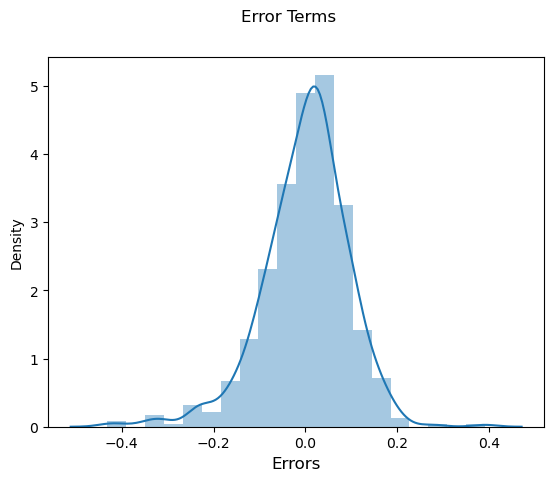

In [140]:
# Plot the histogram to check the error distribution
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 12)  
plt.xlabel('Errors', fontsize = 12)  

As we can see the error is also normally distributed and mean is also lying in 0 which is expected

#### Making Predictions Using the Final Model (Model-6)

##### Applying the scaling on the test sets

In [144]:
bike_vars = ['temp', 'hum', 'windspeed', 'cnt']

bike_test[bike_vars] = scaler.transform(bike_test[bike_vars])

In [145]:
bike_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,light snow & rain,mist & cloudy
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.475410,0.032787,0.726776,0.568688,0.635166,0.316439,0.530233,0.213115,0.273224,0.240437,0.060109,0.076503,0.087432,0.071038,0.125683,0.092896,0.049180,0.087432,0.081967,0.076503,0.087432,0.114754,0.120219,0.120219,0.174863,0.163934,0.109290,0.032787,0.300546
std,0.500765,0.178567,0.446837,0.234887,0.152926,0.159371,0.215783,0.410632,0.446837,0.428521,0.238341,0.266530,0.283242,0.257593,0.332401,0.291083,0.216838,0.283242,0.275067,0.266530,0.283242,0.319599,0.326109,0.326109,0.380892,0.371232,0.312858,0.178567,0.459754
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.362754,0.522601,0.199183,0.393293,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.575304,0.618721,0.303464,0.533134,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.774153,0.735079,0.404383,0.681086,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Dividing into X_test and y_test

In [147]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [148]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [149]:
# Making predictions
y_test_pred = model_6.predict(X_test_new)

#### Model Evaluation

##### R-Square of Final Model on Train Dataset and Test Dataset respectively

In [152]:
print('The R-Square of Final Model on Train Dataset is : ',round(r2_score(y_train,y_train_pred),4))
print('The R-Square of Final Model on Test Dataset is : ',round(r2_score(y_test,y_test_pred),4))

The R-Square of Final Model on Train Dataset is :  0.8254
The R-Square of Final Model on Test Dataset is :  0.7898


Text(0, 0.5, 'y_test_pred')

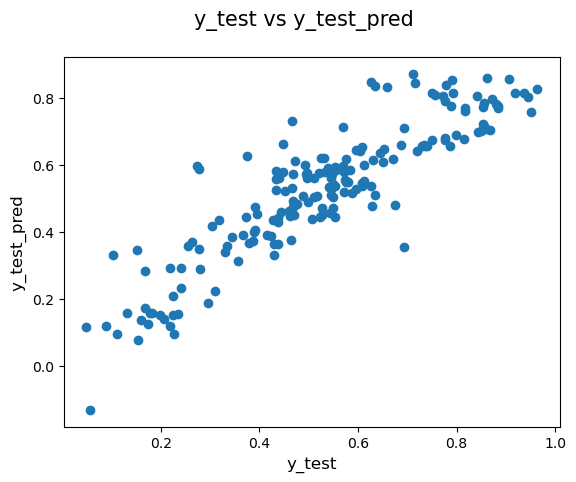

In [153]:
 ## Plotting y_test and y_test_pred 

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 15) 
plt.xlabel('y_test', fontsize = 12)   
plt.ylabel('y_test_pred', fontsize = 12)      

#### Equation for best fitted line

`cnt=0.1351+0.2321×yr−0.1175×holiday+0.4984×temp−0.0641×spring+0.0553×summer+0.1042×winter+0.0932×sep−0.3022×lightsnowandrain−0.0776×mistandcloudy`

#### Conclusion
As per our final Model, the top 3 predictor variables that influences the bike booking are:

- `temp` : A coefficient value of ‘0.4984’ indicates that a unit increase in temp variable increases the bike hire numbers.
- `yr` : A coefficient value of ‘0.2321’ indicates that a unit increase in yr variable increases the bike hire numbers.
- `light snow and rain(weathersit-3)` : A coefficient value of ‘-0.3022’ indicates that, w.r.t Weathersit3, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.3022 units.
- `holiday` : A coefficient value of −0.1175 indicates that bike hire number decreses on holidays.
- `season` : W.r.t coefficient value of season(Summer,winter and spring) it is observed that most bike are rented in summer then in winter and coefficient of springs indicated that less bike are rented in spring



So, it's suggested to consider these variables as importance while planning, to achive maximum Booking